In [2]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('../ce889_dataCollection.csv', header=None, names=['X_dist', 'Y_dist', 'Vx', 'Vy'])
print(data.head())  # 打印前几行查看数据


       X_dist  Y_dist   Vx    Vy
0  433.741688   431.9  0.0  0.00
1  433.741688   431.9 -0.1  0.04
2  433.701688   432.0 -0.2  0.00
3  433.701688   432.2 -0.3  0.04
4  433.661688   432.5 -0.4  0.00


In [3]:
# 检查缺失值
print(data.isnull().sum())

X_dist    0
Y_dist    0
Vx        0
Vy        0
dtype: int64


数据预览:
       X_dist  Y_dist   Vx    Vy
0  433.741688   431.9  0.0  0.00
1  433.741688   431.9 -0.1  0.04
2  433.701688   432.0 -0.2  0.00
3  433.701688   432.2 -0.3  0.04
4  433.661688   432.5 -0.4  0.00

缺失值检查:
X_dist    0
Y_dist    0
Vx        0
Vy        0
dtype: int64

描述性统计:
           X_dist      Y_dist          Vx          Vy
count  350.000000  350.000000  350.000000  350.000000
mean    50.069655  598.888167    1.048358    1.195184
std    208.841575  184.101201    3.790855    2.723371
min   -139.636963   72.854003   -4.218313   -2.733733
25%   -133.522624  476.492097   -2.131489   -0.773733
50%    -26.087568  633.864339   -0.097754    0.015615
75%    215.408925  753.749779    4.142872    3.461306
max    433.741688  814.170038    7.879208    6.740827


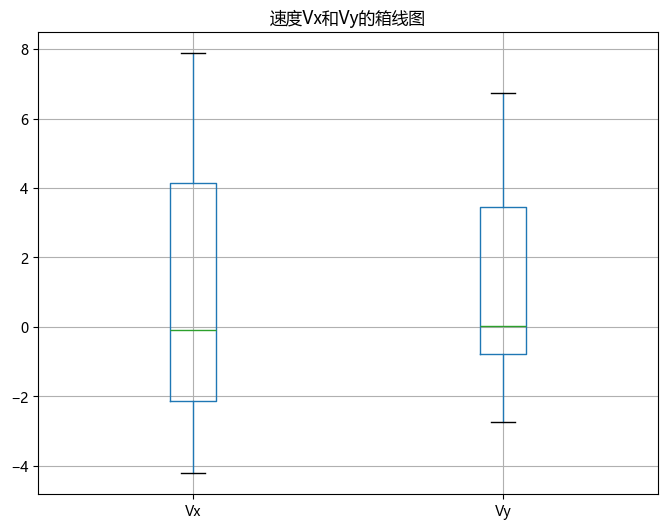

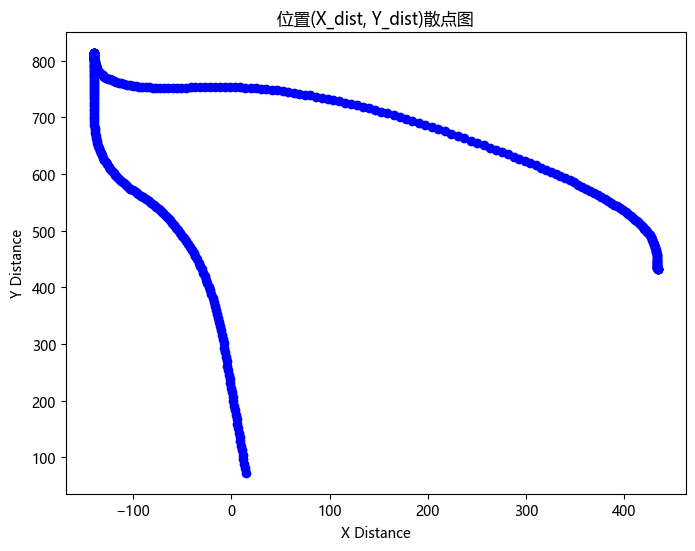


裁剪后的数据预览:
       X_dist  Y_dist   Vx    Vy
0  433.741688   431.9  0.0  0.00
1  433.741688   431.9 -0.1  0.04
2  433.701688   432.0 -0.2  0.00
3  433.701688   432.2 -0.3  0.04
4  433.661688   432.5 -0.4  0.00

归一化后的数据预览:
    X_dist    Y_dist        Vx        Vy
0  1.00000  0.484336  0.348692  0.288534
1  1.00000  0.484336  0.340426  0.292756
2  0.99993  0.484471  0.332160  0.288534
3  0.99993  0.484741  0.323894  0.292756
4  0.99986  0.485145  0.315628  0.288534

训练集和测试集的大小:
X_train: (280, 4), X_test: (70, 4)
y_train: (280, 2), y_test: (70, 2)


In [10]:
from matplotlib import rcParams
# 1. 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# 设置字体为 SimHei（支持中文）

# 2. 读取CSV文件
data = pd.read_csv('../ce889_dataCollection.csv', header=None, names=['X_dist', 'Y_dist', 'Vx', 'Vy'])
print("数据预览:")
print(data.head())  # 打印前几行查看数据

# 3. 检查是否有缺失值
print("\n缺失值检查:")
print(data.isnull().sum())  # 检查缺失值

# 4. 描述性统计分析
print("\n描述性统计:")
print(data.describe())  # 查看数据的统计信息

rcParams['font.family'] = ['Microsoft YaHei']

# 5. 数据可视化：速度分布的箱线图
plt.figure(figsize=(8, 6))
data[['Vx', 'Vy']].boxplot()
plt.title("速度Vx和Vy的箱线图")
plt.show()

# 6. 数据可视化：位置分布的散点图
plt.figure(figsize=(8, 6))
plt.scatter(data['X_dist'], data['Y_dist'], c='blue', label='Position')
plt.xlabel('X Distance')
plt.ylabel('Y Distance')
plt.title('位置(X_dist, Y_dist)散点图')
plt.show()

# 7. 异常值处理：限制速度值的范围
# 假设速度超过10的值为异常值，进行裁剪
threshold = 10
data[['Vx', 'Vy']] = data[['Vx', 'Vy']].clip(upper=threshold)

print("\n裁剪后的数据预览:")
print(data.head())

# 8. 归一化数据：将所有数据缩放到0-1之间
scaler = MinMaxScaler()
data[['X_dist', 'Y_dist', 'Vx', 'Vy']] = scaler.fit_transform(data[['X_dist', 'Y_dist', 'Vx', 'Vy']])

print("\n归一化后的数据预览:")
print(data.head())  # 查看归一化后的数据

# 9. 数据分割：分为训练集和测试集
from sklearn.model_selection import train_test_split

# 特征（X）和目标（y）
X = data[['X_dist', 'Y_dist', 'Vx', 'Vy']]  # 输入特征
y = data[['X_dist', 'Y_dist']]  # 输出目标

# 将数据分为训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n训练集和测试集的大小:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
